# Imports and data loading

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

notebook_dir = Path().resolve()
base_path = os.path.abspath(notebook_dir.parent.parent)
sys.path.append(base_path)
from src.data_utils import *

In [2]:
data_path = os.path.join(base_path, "data", "data_final")
csv_path = os.path.join(data_path, "final_dataset.csv")

In [3]:
df = load_final_data_with_embeddings(csv_path, data_path, verbose=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92374 entries, 0 to 92373
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   movie_id                       92374 non-null  object 
 1   country                        91534 non-null  object 
 2   imdb_id                        91006 non-null  object 
 3   duration                       57734 non-null  float64
 4   duration_all                   57734 non-null  object 
 5   actors_id                      75496 non-null  object 
 6   actors                         75496 non-null  object 
 7   directors_id                   86598 non-null  object 
 8   directors                      86598 non-null  object 
 9   genre_id                       80918 non-null  object 
 10  genre                          80884 non-null  object 
 11  release_date                   92374 non-null  object 
 12  wikidata_class                 92374 non-null 

In [5]:
df = df.filter([
    "movie_id", 
    "plot",
    "year",
    "embedding",
    "genre",
    "new_genre",
])

In [6]:
# Label the new genres
with open("../cluster_to_genre_mapping_01122025.json", "r") as f:
    genre_fix_mapping = json.load(f)

df = df[(df["new_genre"] != "Unknown") & (df["new_genre"].notna())].reset_index(drop=True)
df["new_genre"] = df["new_genre"].apply(lambda x: [genre_fix_mapping[i] for i in x.split("|")])

In [7]:
df.shape

(79984, 6)

In [8]:
df.head()

,movie_id,plot,year,embedding,genre,new_genre
0,Q158047,Immanuel Rath is a professor at the local Gymn...,1930,"[-0.04922, 0.0475, 0.003048, -0.011536, -0.020...","drama film, film based on literature",[drama]
1,Q166089,The first act of the film covers Lincoln's ear...,1930,"[-0.012054, 0.0181, -0.04782, 0.01465, -0.0224...","drama film, war film, biographical film, histo...","[drama, family youth and war, biographical]"
2,Q185214,"Chris Christofferson (George F. Marion), the a...",1930,"[-0.01281, -0.011314, -0.04633, -0.001071, -0....","drama film, romance film","[drama, romance]"
3,Q272599,Early in World War I Professor Kantorek gives ...,1930,"[-0.01184, 0.0401, -0.03577, -0.002903, 0.0011...","drama film, war film, film based on a novel","[drama, family youth and war]"
4,Q531332,"Kent (Robert Montgomery), a drunk driver who c...",1930,"[-0.01392, -0.003054, -0.00642, -0.01338, -0.0...","drama film, prison film, crime film, romance film","[drama, crime and thriller, romance, action cr..."


In [10]:
embeddings = np.stack(df.embedding.values)

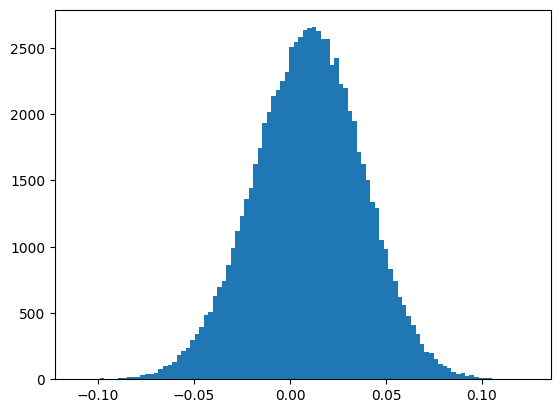

In [18]:
fig, ax = plt.subplots()
ax.hist(embeddings[:, 5], bins=100)
plt.show();